# HTML scraping tutorials

* How to extract information from HTML pages 
* Techniques for navigating and scraping webpages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime
import json
import sys
import random
import requests
import scipy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from IPython.display import HTML, display, Image
from pathlib import Path


##  Python library: Beautiful Soup for web scraping 

(*The Lobster Quadrille*, Alice in Wonderland)

You are now ready to start scraping web pages. 

It all start with a request made using the `requests` package.  This returns a string that we then need to parse.

Parsing is a detail oriented -- likely to become frustrating -- job. It would be a complete nightmare without [`BeautifulSoup`](http://www.crummy.com/software/BeautifulSoup/bs4/doc/). You will notice that we already imported it at the top. Yes, this is thinking ahead!



For completely random reasons, we will use the Wikipedia page for a mediocre German soccer player as an exercise. His page is located [here](https://en.wikipedia.org/wiki/Erik_Durm). To simplify our lives\*, we have already downloaded the page and placed it in the `Data/` folder. 


We start by reading the page into a string and converting it to a `soup` object. 

In [6]:
# We specify the encoding of the file here because the page uses non-standard
# characters which would result in potential crashes of our code.

data_folder = Path.cwd() / 'Data' 
filename = data_folder / 'web_scraping_erik_durm_wiki.html' 

with open(filename, "r", encoding = "utf-8") as wiki_file:
    string_content = wiki_file.read() # read files (not using readlines here)
    soup = BeautifulSoup(string_content,'lxml') # lxml is a Python library which allows for easy handling of XML and HTML files 

print(type(soup))
print()
print(f"-- {soup.text[:60].strip()} -- ")

<class 'bs4.BeautifulSoup'>

-- Erik Durm - Wikipedia, the free encyclopedia -- 


### Searching by `tag` type
Then, we can use the `find` method to find the page's `<title>` tag and print it.

In [10]:
title = soup.find('title')
print(f"The mehotd .find() returns a {type(title)} object./n")
print(f"The text attribute of the tag object is:\n\t{title.text},")
print(f"which is a {type(title.text)} object.\n")
print(f"The contents attribute of the tag object is:\n\t{title.contents}\n")
print(f"which is a {type(title.contents)} object\n")

The mehotd .find() returns a <class 'bs4.element.Tag'> object./n
The text attribute of the tag object is:
	Erik Durm - Wikipedia, the free encyclopedia,
which is a <class 'str'> object.

The contents attribute of the tag object is:
	['Erik Durm - Wikipedia, the free encyclopedia']

which is a <class 'list'> object



Beautiful Soup converts HTML tags into its own `tag` objects that have many useful attributes. 

If a tag has any html attributes, they can be accessed in a very "pythonic" way. That is, they are organized as a dictionary!



In [12]:
print(title.name) # the type of tag 
help(title)

title
Help on Tag in module bs4.element object:

class Tag(PageElement)
 |  Tag(parser=None, builder=None, name=None, namespace=None, prefix=None, attrs=None, parent=None, previous=None, is_xml=None, sourceline=None, sourcepos=None, can_be_empty_element=None, cdata_list_attributes=None, preserve_whitespace_tags=None, interesting_string_types=None, namespaces=None)
 |  
 |  Represents an HTML or XML tag that is part of a parse tree, along
 |  with its attributes and contents.
 |  
 |  When Beautiful Soup parses the markup <b>penguin</b>, it will
 |  create a Tag object representing the <b> tag.
 |  
 |  Method resolution order:
 |      Tag
 |      PageElement
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      A tag is non-None even if it has no contents.
 |  
 |  __call__(self, *args, **kwargs)
 |      Calling a Tag like a function is the same as calling its
 |      find_all() method. Eg. tag('a') returns a list of all the A tags
 |      found within 

In [15]:
h_tag = soup.find('h1') # find h1 heading 
# tags can have attributes (within the HTML language)
# the h_tag.attrs is a library 

for x in h_tag.attrs:
    print(f"Key: {x:5} -- Value: {h_tag.attrs[x]}")
    
# this code finds the first heading 

Key: id    -- Value: firstHeading
Key: class -- Value: ['firstHeading']
Key: lang  -- Value: en


### Find multiple matches
We must use the method `.find_next()`.

In [24]:
# find first instance of h2 
header1 = soup.find('h2')
print(header1.text)

# now we use header1.find_next() instead of soup.find()
header2 = header1.find_next('h2')
print(header2.text)

# if we use .find() instead of .find_next(), we will find nothing 
header3 = header2.find_next('h2')
print(header3.text)

Contents
Club career[edit]
International career[edit]


We can also retrieve all instances at all once using `.find_all()`. We should expect a `list` of `tag` object in return.  

In [34]:
headers = soup.find_all('h2')
print(f"The variable headers is a {type(headers)} object.\n")
print(f"Because it is list-like, it has a length: {len(headers)}.\n")
print(f"Its first item is {headers[0]} and its last is {headers[-1]}\n")

headers_list = list(headers) # we can convert it to a python list 
for n in range(0,3):
    print(f"{headers_list[n]}\n")


The variable headers is a <class 'bs4.element.ResultSet'> object.

Because it is list-like, it has a length: 8.

Its first item is <h2>Contents</h2> and its last is <h2>Navigation menu</h2>

<h2>Contents</h2>

<h2><span class="mw-headline" id="Club_career">Club career</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a><span class="mw-editsection-bracket">]</span></span></h2>

<h2><span class="mw-headline" id="International_career">International career</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=4" title="Edit section: International career">edit</a><span class="mw-editsection-bracket">]</span></span></h2>



In [35]:
for header in headers[:2]:
    print(f"++++\t{header.name} -- {header.contents}")
    
    for item in header.contents:
        print(f"\t\t--{item}")
        print(f"\t\t--{item.text}\n")

++++	h2 -- ['Contents']
		--Contents
		--Contents

++++	h2 -- [<span class="mw-headline" id="Club_career">Club career</span>, <span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a><span class="mw-editsection-bracket">]</span></span>]
		--<span class="mw-headline" id="Club_career">Club career</span>
		--Club career

		--<span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a><span class="mw-editsection-bracket">]</span></span>
		--[edit]



Some other useful attributes to find links: 

In [41]:
links = soup.find_all('a')
print(len(links)) # we found 359 links 

for link in links[:5]:
    # href represents the target of the link
    # where the link actually goes to. 
    print(f"\n--{link}")
    print(f"\t Attributes of the tag objects: {link.attrs}")
    # recall tag.attrs returns a dictionary 
    print(f"\t\t Value of the link: {link.get('href')}")
    
    

359

--<a id="top"></a>
	 Attributes of the tag objects: {'id': 'top'}
		 Value of the link: None

--<a href="#mw-head">navigation</a>
	 Attributes of the tag objects: {'href': '#mw-head'}
		 Value of the link: #mw-head

--<a href="#p-search">search</a>
	 Attributes of the tag objects: {'href': '#p-search'}
		 Value of the link: #p-search

--<a class="image" href="/wiki/File:Erik_Durm_IMG_1748.jpg"><img src="www/images/Erik_Durm_IMG_1748.jpg"/></a>
	 Attributes of the tag objects: {'href': '/wiki/File:Erik_Durm_IMG_1748.jpg', 'class': ['image']}
		 Value of the link: /wiki/File:Erik_Durm_IMG_1748.jpg

--<a href="/wiki/Borussia_Dortmund" title="Borussia Dortmund">BVB</a>
	 Attributes of the tag objects: {'href': '/wiki/Borussia_Dortmund', 'title': 'Borussia Dortmund'}
		 Value of the link: /wiki/Borussia_Dortmund


###  Searching using attribute information 

Some `tag` elements have attributes associated with them. These include `id`, `class_`, `href`. Our search can restrict results to attributes with a specific value or to results where the attribute type is included.

In [54]:
# retrive the element with the aattribute "id" equal to "Early_career"
tag = soup.find(id="Early_career")
print(tag)
print(tag.text)
print('-'*50)

# retrieve all elements with a href attribute  
all_links = soup.find_all(href=True)
print(f"The length of all_links is {len(all_links)}")
print('-'*50)


# retrieve inline citations -- they are <sup> elements with the class "reference"
all_inlines = soup.find_all('sup',class_='reference')[5:15]
print(all_inlines[0])
print('-'*50)

# Retrieve all tags with class=mw-headline and an id attribute (regardless of value)
soup.find_all(attrs={"class": "mw-headline", "id": True})




<span class="mw-headline" id="Early_career">Early career</span>
Early career
--------------------------------------------------
The length of all_links is 373
--------------------------------------------------
<sup class="reference" id="cite_ref-6"><a href="#cite_note-6"><span>[</span>6<span>]</span></a></sup>
--------------------------------------------------


[<span class="mw-headline" id="Club_career">Club career</span>,
 <span class="mw-headline" id="Early_career">Early career</span>,
 <span class="mw-headline" id="Borussia_Dortmund">Borussia Dortmund</span>,
 <span class="mw-headline" id="International_career">International career</span>,
 <span class="mw-headline" id="Youth">Youth</span>,
 <span class="mw-headline" id="Senior">Senior</span>,
 <span class="mw-headline" id="Career_statistics">Career statistics</span>,
 <span class="mw-headline" id="Club">Club</span>,
 <span class="mw-headline" id="International">International</span>,
 <span class="mw-headline" id="Honours">Honours</span>,
 <span class="mw-headline" id="Club_2">Club</span>,
 <span class="mw-headline" id="International_2">International</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="External_links">External links</span>]

### Navigating the HTML tree with Beautiful Soup

Besides being able to search elements anywhere on the whole HTML tree, Beautiful Soup also allows us to navigate the tree in any direction. 

Let's try to get at the first paragraph (`<p>`) in the `Club career` section starting from the section's title tag. Here we have  the HTML snippet: 

```html
    <h2>
      <span class="mw-headline" id="Club_career">Club career</span>
      <span class="mw-editsection">
        <span class="mw-editsection-bracket">[</span>
        <a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a>
        <span class="mw-editsection-bracket">]</span>
      </span>
    </h2>
    <h3>
      <span class="mw-headline" id="Early_career">Early career</span>
      <span class="mw-editsection">
        <span class="mw-editsection-bracket">[</span>
        <a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=2" title="Edit section: Early career">edit</a>
        <span class="mw-editsection-bracket">]</span>
      </span>
    </h3>
    <p>Durm began his club career in 1998 at the academy of SG Rieschweiler....</p>
```

The actual text appear in the `HTML` code after the `p` tag, which appears both in the page and in the code after *Club career* title: 

In [59]:
section_headline = soup.find(id='Club_career')
print(section_headline)
print(section_headline.text)
print(section_headline.contents)

<span class="mw-headline" id="Club_career">Club career</span>
Club career
['Club career']


The `contents` attribute gives us access to everything contained within the relavent `tag` as a `list`. 
In this case we only find visible texts of the tag. Looking at the webpage snippet, we see that the tag `<p>` is at the *same level* as the tags `h2` and `h3`. The `h2` tag has two siblings: an `h3 tag` and a `p tag`.

In [64]:
parent_of_title = section_headline.parent # up one level
print(f"The section_headline is of type:\t{section_headline.name}")
print()

print(f"The parent of section_headline is of type:\t{parent_of_title.name}")
print()

print(parent_of_title.contents)            
print('-'*50)

one_step = parent_of_title.nextSibling
print(f"---- one_step is a \t{type(one_step)}\n")

print(f"--It has the value:\n--\n--{one_step}--\n")

two_steps = parent_of_title.nextSibling.nextSibling
print(f"---- two_steps is of type:\t{type(two_steps)}\n")

print(f"It has the value:\n--\n--{two_steps}--\n")
print('-'*50)

three_steps = two_steps.nextSibling
print(f"\n---- three_steps is a \t{type(three_steps)}\n")

print(f"--It has the value:\n--\n--{three_steps}--\n")

four_steps = three_steps.nextSibling
print(f"---- four_steps is of type:\t{type(four_steps)}\n")

print(f"It has the value:\n--\n--{four_steps}--\n")

The section_headline is of type:	span

The parent of section_headline is of type:	h2

[<span class="mw-headline" id="Club_career">Club career</span>, <span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=1" title="Edit section: Club career">edit</a><span class="mw-editsection-bracket">]</span></span>]
--------------------------------------------------
---- one_step is a 	<class 'bs4.element.NavigableString'>

--It has the value:
--
--
--

---- two_steps is of type:	<class 'bs4.element.Tag'>

It has the value:
--
--<h3><span class="mw-headline" id="Early_career">Early career</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Erik_Durm&amp;action=edit&amp;section=2" title="Edit section: Early career">edit</a><span class="mw-editsection-bracket">]</span></span></h3>--

--------------------------------------------------

---- three_steps is a 	<clas

We can put the contants of our desired element in a list. Let's obtain the number of elements and check what they contain.

In [67]:
print(four_steps.name)
print(four_steps.contents)

print(len(four_steps.contents))

for i, item in enumerate(four_steps.contents):
    print(f"{i:2} : {str(item)[:80]}")



p
['Durm began his club career in 1998 at the academy of SG Rieschweiler, before joining the academy of ', <a href="/wiki/1._FC_Saarbr%C3%BCcken" title="1. FC Saarbrücken">1. FC Saarbrücken</a>, ' in 2008 where he became youth league top scorer of the 2009–2010 season with 13 goals.', <sup class="reference" id="cite_ref-pfaelzischer-merkur.de_2-0"><a href="#cite_note-pfaelzischer-merkur.de-2"><span>[</span>2<span>]</span></a></sup>, ' In July 2010, Durm was enrolled at the academy of ', <a href="/wiki/1._FSV_Mainz_05" title="1. FSV Mainz 05">1. FSV Mainz 05</a>, ' and won the 2010–11 Youth Federation Cup in Germany and Durm debuted and played his only game of the 2010–11 season for the second team of 1. FSV Mainz 05 on 4 December 2010 against ', <a href="/wiki/SV_Elversberg" title="SV Elversberg">SV Elversberg</a>, ' in the German ', <a href="/wiki/Regionalliga" title="Regionalliga">Regionalliga</a>, '.', <sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span>[</span>3<spa

To review: in order to find the desired tag, we choose a easily identifiable starting point -- `id` is great because its value *should* be unique -- and then navigate the HTML tree to the correct parent and transversed siblings until we got to the right one. 

Clearly, this is not a very elegant solution. 

If there were hundreds of siblings that would have been very cumbersome. We can use `.find_next_sibling()` to achieve that. 

In [68]:
p_sibling = parent_of_title.find_next_sibling('p')
print(f"---- four_steps is of type:\t{type(p_sibling)}\n")

print(f"It has the value:\n--\n--{p_sibling}--\n")

---- four_steps is of type:	<class 'bs4.element.Tag'>

It has the value:
--
--<p>Durm began his club career in 1998 at the academy of SG Rieschweiler, before joining the academy of <a href="/wiki/1._FC_Saarbr%C3%BCcken" title="1. FC Saarbrücken">1. FC Saarbrücken</a> in 2008 where he became youth league top scorer of the 2009–2010 season with 13 goals.<sup class="reference" id="cite_ref-pfaelzischer-merkur.de_2-0"><a href="#cite_note-pfaelzischer-merkur.de-2"><span>[</span>2<span>]</span></a></sup> In July 2010, Durm was enrolled at the academy of <a href="/wiki/1._FSV_Mainz_05" title="1. FSV Mainz 05">1. FSV Mainz 05</a> and won the 2010–11 Youth Federation Cup in Germany and Durm debuted and played his only game of the 2010–11 season for the second team of 1. FSV Mainz 05 on 4 December 2010 against <a href="/wiki/SV_Elversberg" title="SV Elversberg">SV Elversberg</a> in the German <a href="/wiki/Regionalliga" title="Regionalliga">Regionalliga</a>.<sup class="reference" id="cite_ref-3

### Scraping images from a webpage 

We can also use the Beautiful Soup library to get the source of an image from a webpage.

In [69]:
for i, image in enumerate(soup.find_all('img')):
    print(f"{i:>2} -- {str(image)[:50]}")

 0 -- <img src="www/images/Erik_Durm_IMG_1748.jpg"/>
 1 -- <img src="www/images/Erik_Durm20140714_0009.jpg"/>
 2 -- <img alt="Germany" class="thumbborder" data-file-h
 3 -- <img alt="" height="1" src="//en.wikipedia.org/wik
 4 -- <img alt="Wikimedia Foundation" height="31" src="/
 5 -- <img alt="Powered by MediaWiki" height="31" src="h


We can pinpoint a specific image and get its attributes: 

In [70]:
images = soup.find_all('img')
print(images[0].attrs)

{'src': 'www/images/Erik_Durm_IMG_1748.jpg'}


We can also display it using its `scr` attribute. Or use `url`.

C:\Users\zhouz\OneDrive - Northwestern University\career\NICOL 401\Amaral_Lab_Intro_to_Data_Science-main\Module_Interacting_w_Online_Data\Data\www\images\Erik_Durm_IMG_1748.jpg


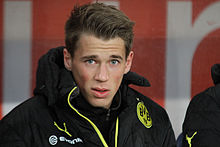

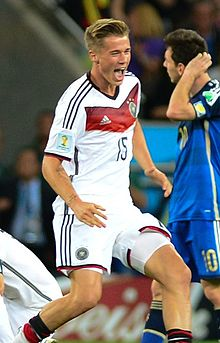


--------------------------------------------------


In [77]:
print(data_folder / images[0]['src'])
for j in range(2):
    display(Image(filename =  data_folder / images[j]['src']))
    print()
    
print('-'*50)

real_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Erik_Durm_2014_%28cropped%29.jpg/440px-Erik_Durm_2014_%28cropped%29.jpg' 
display(Image(url = real_url, width= 100))

## Example 1:

The following function converts Erik Durm's wikipedia page  into a soup object and extracts the `<p>` element that starts with "In the 2013–14 Bundesliga season...". The function return the Beautiful Soup's `Tag` object itself.